<a href="https://colab.research.google.com/github/musiur/preprocess_salary_dataset/blob/main/data-cleaning-salary-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd

# Try setting error_bad_lines=False to skip bad lines
df = pd.read_csv('job_descriptions.csv', engine="python", on_bad_lines='warn')

# Print the column names to check if 'description' exists and if not what the correct name is
print(df.columns)

# Assuming the column is named 'job_description' based on the provided global variables
# salary_range_count = df['job_description'].str.contains(r'\$\d+,\d+ - \$\d+,\d+|\$\d+ - \$\d+').sum()

# print(f"Number of tuples with salary range: {salary_range_count}")


Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')


In [29]:
df.shape

(1615940, 23)

In [30]:
print(df.describe())

             Job Id      latitude     longitude  Company Size
count  1.615940e+06  1.615940e+06  1.615940e+06  1.615940e+06
mean   1.548935e+15  1.937743e+01  1.639926e+01  7.370467e+04
std    8.946722e+14  2.355690e+01  7.066762e+01  3.529886e+04
min    1.817948e+11 -4.090060e+01 -1.751982e+02  1.264600e+04
25%    7.740508e+14  5.152100e+00 -1.531010e+01  4.311400e+04
50%    1.547858e+15  1.807080e+01  1.914510e+01  7.363300e+04
75%    2.323729e+15  3.907420e+01  4.757690e+01  1.043000e+05
max    3.099618e+15  7.170690e+01  1.780650e+02  1.348340e+05


In [31]:
print(len(df))

1615940


In [32]:
df.tail()


,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
1615935,134563577088850,0 to 12 Years,B.Tech,$64K-$114K,"Malabo (de jure),",Equatorial Guinea,1.6508,10.2679,Full-Time,18281,...,950-451-5843,Mechanical Engineer,Mechanical Design Engineer,ZipRecruiter,Mechanical Design Engineers create and develop...,"{'Employee Assistance Programs (EAP), Tuition ...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",The Hershey Company,"{""Sector"":""Food and Beverage/Confectionery"",""I..."
1615936,618604818190827,2 to 14 Years,M.Tech,$62K-$130K,Warsaw,Poland,51.9194,19.1451,Intern,63621,...,676.387.1572x71877,IT Manager,IT Director,USAJOBS,An IT Director oversees an organizations IT de...,"{'Health Insurance, Retirement Plans, Paid Tim...",Strategic IT planning Leadership and managemen...,Provide strategic leadership for IT department...,EQT,"{""Sector"":""Energy"",""Industry"":""Energy"",""City"":..."
1615937,615471367712200,4 to 15 Years,BCA,$60K-$96K,Ashgabat,Turkmenistan,38.9697,59.5563,Part-Time,114287,...,537.384.6193x5284,Mechanical Engineer,Mechanical Design Engineer,Indeed,Mechanical Design Engineers create and develop...,"{'Tuition Reimbursement, Stock Options or Equi...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",KLA,"{""Sector"":""Technology"",""Industry"":""Semiconduct..."
1615938,804137342023945,5 to 15 Years,BCA,$65K-$103K,Ouagadougou,Burkina Faso,12.2383,-1.5616,Full-Time,45009,...,(484)257-4755x5346,HR Coordinator,Training Coordinator,Stack Overflow Jobs,Training Coordinators design and implement emp...,"{'Casual Dress Code, Social and Recreational A...",Training program coordination Training materia...,"Coordinate employee training programs, track t...",Mahindra & Mahindra,"{""Sector"":""Automotive"",""Industry"":""Automotive""..."
1615939,404645755314484,1 to 11 Years,BBA,$56K-$109K,Asmara,Eritrea,15.1794,39.7823,Part-Time,87637,...,(989)703-9723,Event Planner,Wedding Planner,USAJOBS,Wedding Planners specialize in organizing wedd...,"{'Transportation Benefits, Professional Develo...",Wedding planning Venue selection Catering and ...,"Specialize in wedding planning, assisting coup...",Ashtead Group,"{""Sector"":""Equipment Rental"",""Industry"":""Equip..."


In [33]:
df.shape

(1615940, 23)

Data Clening


In [34]:
df.isnull()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1615936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1615937,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1615938,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
df.isnull().sum()

Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64

In [36]:
df.isnull().sum().sum()

np.int64(5478)

In [37]:
df.shape

(1615940, 23)

In [38]:
df=df.dropna()

In [39]:
df.shape

(1610462, 23)

In [40]:
df.isnull().sum()

Job Id              0
Experience          0
Qualifications      0
Salary Range        0
location            0
Country             0
latitude            0
longitude           0
Work Type           0
Company Size        0
Job Posting Date    0
Preference          0
Contact Person      0
Contact             0
Job Title           0
Role                0
Job Portal          0
Job Description     0
Benefits            0
skills              0
Responsibilities    0
Company             0
Company Profile     0
dtype: int64

duplicates

In [41]:
df[df.duplicated()]

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile


In [42]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

Outliers


<Axes: ylabel='Experience'>

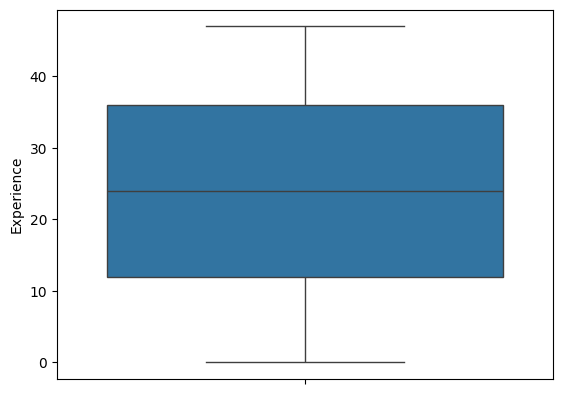

In [61]:
import seaborn as sns
sns.boxplot(y=df['Experience'], legend='auto')

In [44]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

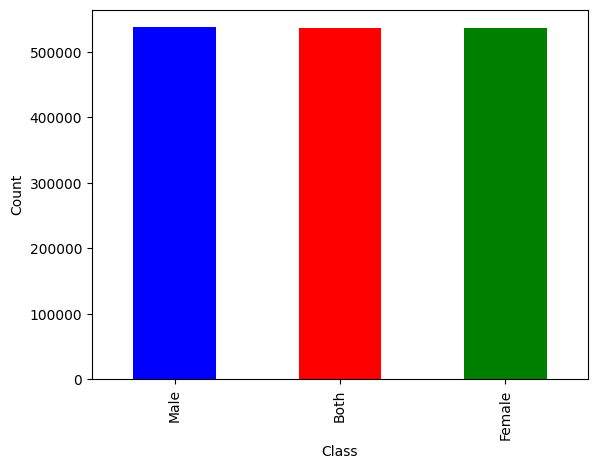

In [45]:
import matplotlib.pyplot as plt

df['Preference'].value_counts().plot(kind='bar', color=['blue', 'red', 'green'])
# plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

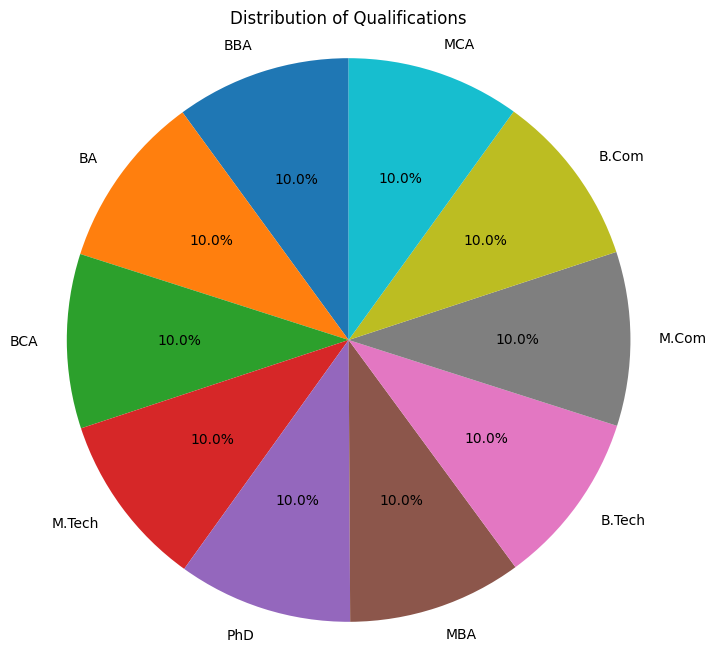

In [46]:


import matplotlib.pyplot as plt

# Assuming 'Qualifications' is a column in your DataFrame 'df'
qualification_counts = df['Qualifications'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(qualification_counts, labels=qualification_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Qualifications')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [47]:
# prompt: count how many job roles and job title are there

job_role_count = df['Role'].nunique()
job_title_count = df['Job Title'].nunique()
job_company_count = df['Company'].nunique()

print(f"Number of unique roles: {job_role_count}")
print(f"Number of unique job titles: {job_title_count}")
print(f"Number of unique companies: {job_title_count}")


Number of unique roles: 376
Number of unique job titles: 147
Number of unique companies: 147


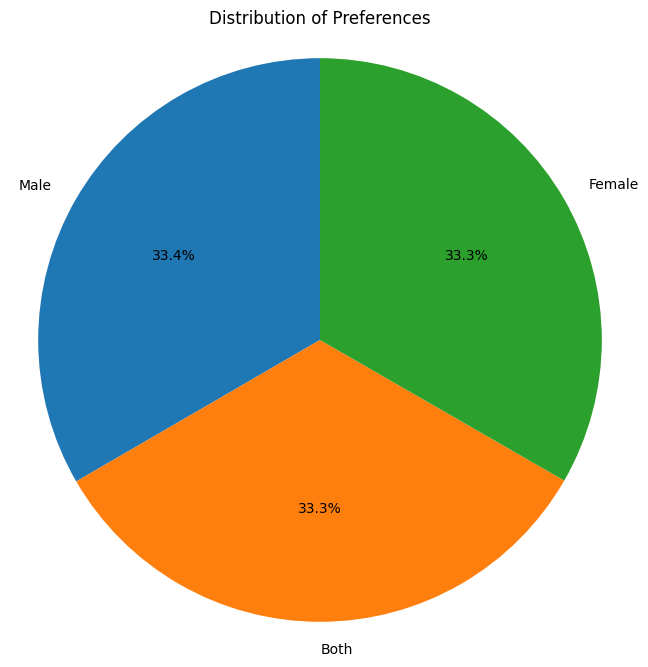

In [48]:
# prompt: make pie chart using pyplot for Preference

preference_counts = df['Preference'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(preference_counts, labels=preference_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Preferences')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


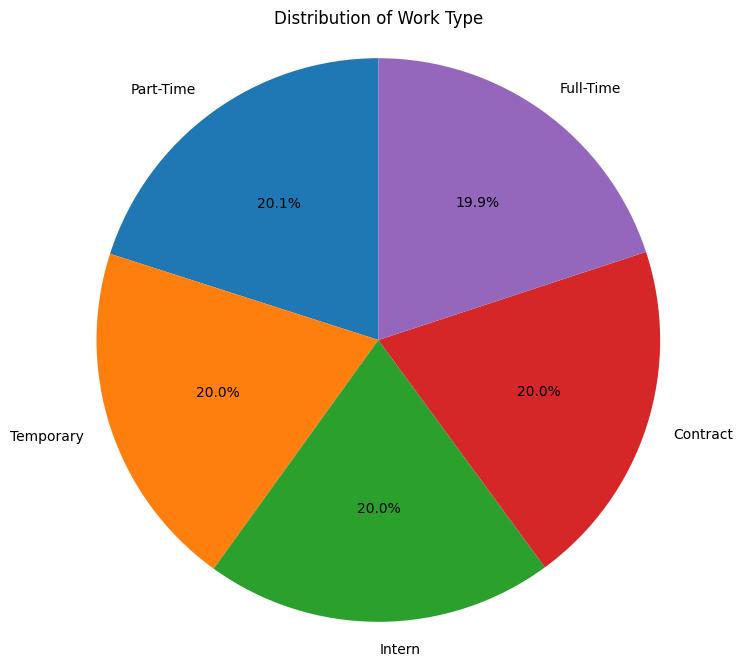

In [49]:
# prompt: make a pie chart using pylplot of Work Type

import matplotlib.pyplot as plt

work_type_counts = df['Work Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(work_type_counts, labels=work_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Work Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [50]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

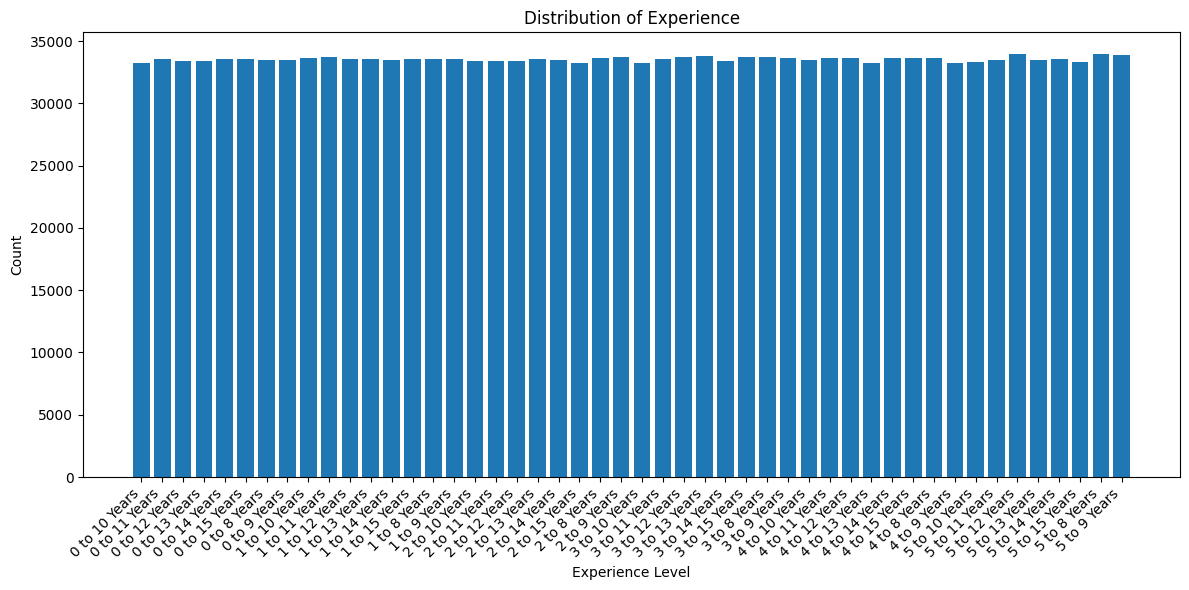

In [51]:
# prompt: Using Pyplot make barchart from left to right I mean the y axis will be x axis for Experience. Make gap 10px between bar more so that levels are not overlape

import matplotlib.pyplot as plt

# Assuming 'Experience' is a column in your DataFrame 'df'
experience_counts = df['Experience'].value_counts().sort_index()

# Create a bar chart with custom width and spacing
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bar_width = 0.8
bar_spacing = 10  # Adjust the spacing between bars as needed

plt.bar(experience_counts.index, experience_counts.values, width=bar_width)

# Customize the chart
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Distribution of Experience')

# Set x-axis ticks and labels
plt.xticks(experience_counts.index, rotation=45, ha='right')

# Add spacing between bars
plt.tight_layout()


plt.show()


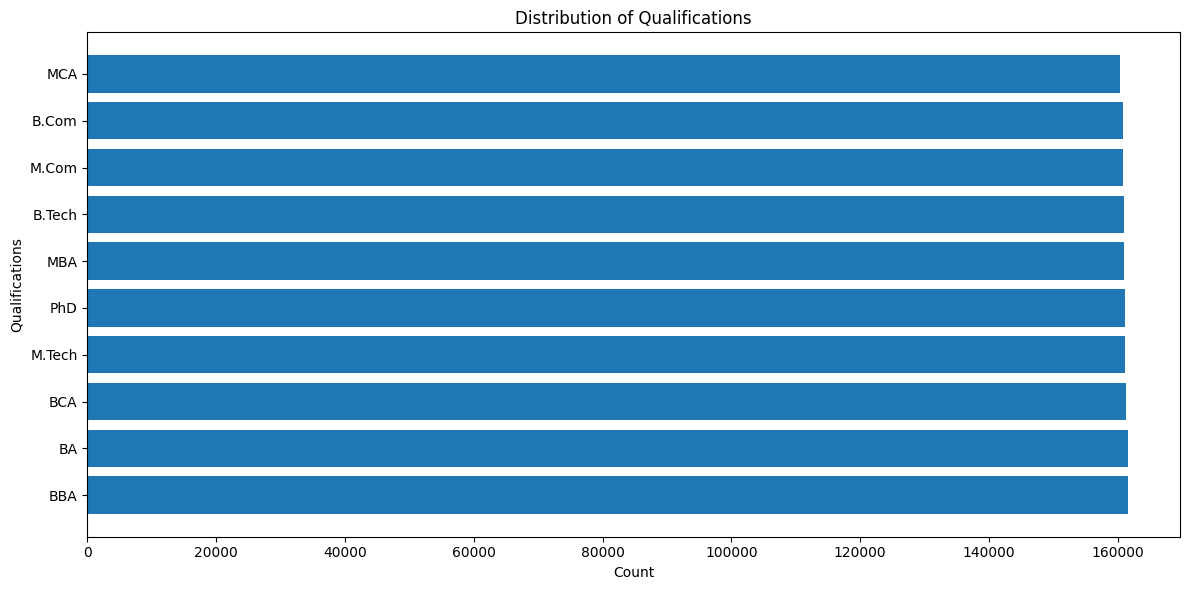

In [52]:
# prompt: Using Pyplot make barchart from left to right I mean the y axis will be x axis for Qualifications. Make gap 10px between bar more so that levels are not overlape

import matplotlib.pyplot as plt

# Assuming 'Qualifications' is a column in your DataFrame 'df'
qualification_counts = df['Qualifications'].value_counts()

# Create a horizontal bar chart with custom width and spacing
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bar_width = 0.8
bar_spacing = 10  # Adjust the spacing between bars as needed

# Create the bar chart with horizontal orientation
plt.barh(qualification_counts.index, qualification_counts.values, height=bar_width)

# Customize the chart
plt.xlabel('Count')
plt.ylabel('Qualifications')
plt.title('Distribution of Qualifications')

# Set x-axis ticks and labels
#plt.xticks(qualification_counts.index, rotation=45, ha='right')

# Add spacing between bars
plt.tight_layout()

plt.show()


In [53]:
# prompt: count each qualifications

# Assuming 'Qualifications' is a column in your DataFrame 'df'
qualification_counts = df['Qualifications'].value_counts()

print(qualification_counts)


Qualifications
BBA       161574
BA        161566
BCA       161215
M.Tech    161186
PhD       161109
MBA       160967
B.Tech    160886
M.Com     160833
B.Com     160774
MCA       160352
Name: count, dtype: int64


In [54]:
# prompt: Do level Encoding for each level in dataset and show in a table

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for column in df.columns:
  # Check if the column's data type is object (categorical)
  if df[column].dtype == 'object':
    # Fit and transform the column using LabelEncoder
    df[column] = label_encoder.fit_transform(df[column])

# Display the DataFrame with encoded values
print(df)


                   Job Id  Experience  Qualifications  Salary Range  location  \
0        1089843540111562          45               6           254        59   
1         398454096642776          18               4            67        11   
2         481640072963533           2               9           310       102   
3         688192671473044          33               9           552       152   
4         117057806156508          10               7           497       172   
...                   ...         ...             ...           ...       ...   
1615935   134563577088850           2               1           473       105   
1615936   618604818190827          20               6           387       204   
1615937   615471367712200          37               4           302        11   
1615938   804137342023945          45               4           513       139   
1615939   404645755314484           9               3            60        12   

         Country  latitude 

In [55]:
df.shape

(1610462, 23)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610462 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1610462 non-null  int64  
 1   Experience        1610462 non-null  int64  
 2   Qualifications    1610462 non-null  int64  
 3   Salary Range      1610462 non-null  int64  
 4   location          1610462 non-null  int64  
 5   Country           1610462 non-null  int64  
 6   latitude          1610462 non-null  float64
 7   longitude         1610462 non-null  float64
 8   Work Type         1610462 non-null  int64  
 9   Company Size      1610462 non-null  int64  
 10  Job Posting Date  1610462 non-null  int64  
 11  Preference        1610462 non-null  int64  
 12  Contact Person    1610462 non-null  int64  
 13  Contact           1610462 non-null  int64  
 14  Job Title         1610462 non-null  int64  
 15  Role              1610462 non-null  int64  
 16  Job P

** Feature Engineering**

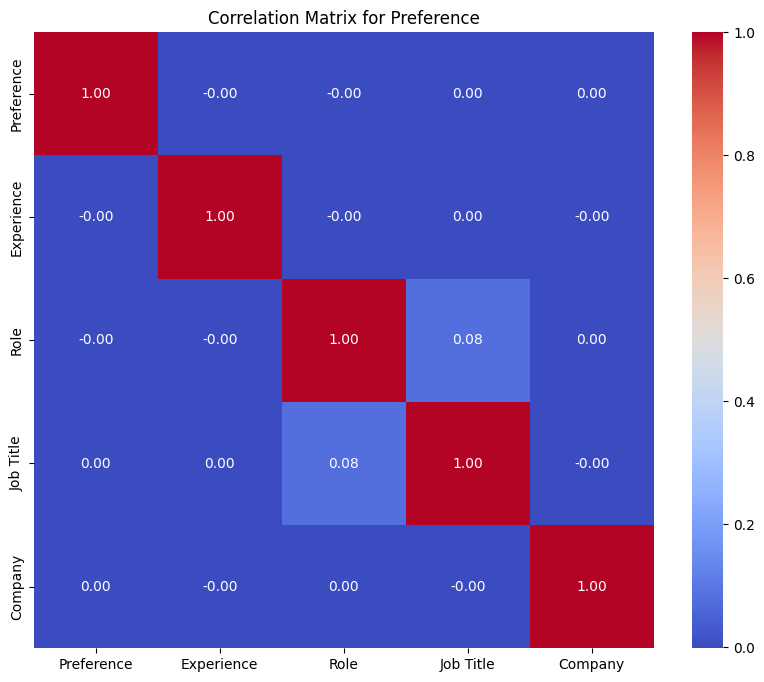

In [57]:
# prompt: find co relation for Preference and make heatmap using pyplot

correlation_matrix = df[['Preference', 'Experience', 'Role', 'Job Title', 'Company']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Preference')
plt.show()


In [58]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

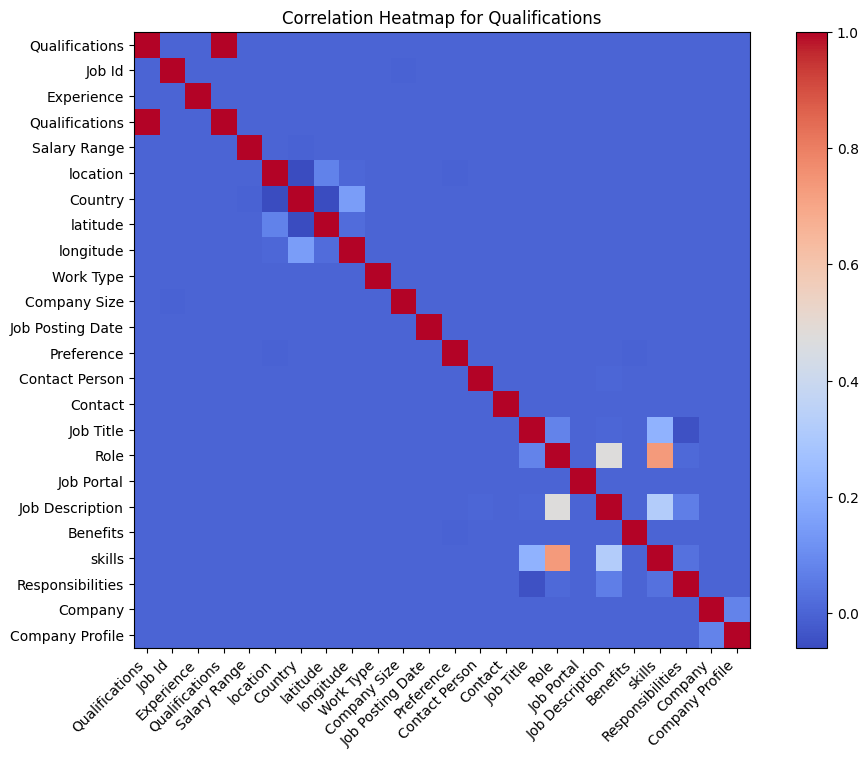

In [59]:
# prompt: find co relation for Qualifications and make heatmap using pyplot

# Assuming 'Qualifications' is a column in your DataFrame 'df'
# and you want to find the correlation between 'Qualifications' and other numerical features.

# Select the numerical features you want to analyze the correlation with 'Qualifications'
numerical_features = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for 'Qualifications' and other numerical features
correlation_matrix = df[['Qualifications'] + list(numerical_features)].corr()

# Create a heatmap using matplotlib.pyplot
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap for Qualifications')
plt.show()
